# [繼續](https://medium.com/jackys-blog/machine-learning-%E4%B8%8B%E7%9A%84support-vector-machine%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-3b1c0dc8639c)

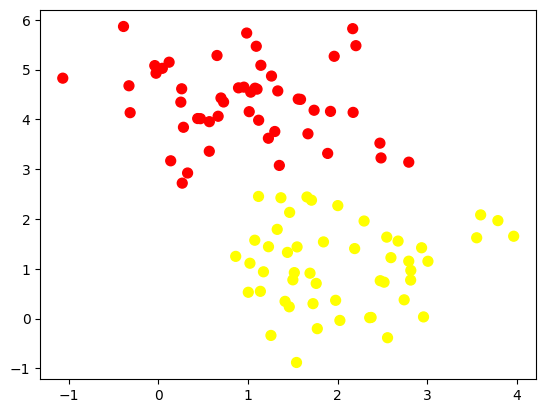

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

#引入資料集
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8) # y是1 OR 0

#建立plot 去看由第一個feature 和第二個feature組成圖
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

In [13]:
#np.ones((100,1))
np.append(x,np.ones((100,1))*-1,axis=1)

array([[ 3.78585628,  1.96688602, -1.        ],
       [ 1.1372926 ,  0.54740762, -1.        ],
       [-0.02596621,  4.92577961, -1.        ],
       [ 0.26604148,  2.71915015, -1.        ],
       [ 3.00569136,  1.15121775, -1.        ],
       [ 1.34880003,  3.07479238, -1.        ],
       [ 1.01287689,  4.15404025, -1.        ],
       [ 3.59362114,  2.08207549, -1.        ],
       [ 0.66640862,  4.06194513, -1.        ],
       [ 1.41253979,  0.34602384, -1.        ],
       [ 0.69794036,  4.4288665 , -1.        ],
       [ 1.75992205,  0.70616032, -1.        ],
       [ 1.14289006,  5.08509856, -1.        ],
       [ 0.25043139,  4.34534364, -1.        ],
       [ 1.84086482,  1.53962878, -1.        ],
       [ 3.96178334,  1.65324725, -1.        ],
       [ 2.95657626,  0.03371845, -1.        ],
       [ 0.43830172,  4.0161448 , -1.        ],
       [ 1.00254159,  0.52839598, -1.        ],
       [ 1.43933466,  1.32906301, -1.        ],
       [ 1.10022802,  4.60631734, -1.   

In [12]:
#以正確的格式方入
train_f1 = x[:,0]
train_f2 = x[:,1]
train_b=np.ones((100,1))
train_f1 = train_f1.reshape(100,1)
train_f2 = train_f2.reshape(100,1)
train_total=np.c_[train_f1,train_f2,train_b]

#權重(要包括bias)
w=np.zeros(train_total.shape[1])

y_train = np.array(y)
y_train.reshape(100,1)

epochs=1
#此為learning rate
alpha=0.0005

while(epochs < 10000):
    #hyperplane 預測y值
    y_new2 = np.dot(train_total,w)
    #求出>1 =1 or <1
    prod = ((y_new2.ravel()) * (y_train.ravel()))
    #print(epochs)
    count = 0
    for val in prod:
      #檢測是否有>=1 如果有,就表示正確分類
        if(val >= 1):
            cost = 0
            w=w-alpha * (2 * 1/epochs * w)
      #沒有 表示為錯誤分類
        else:
            cost = 1 - val 
            w = w + alpha * (train_total[count] * y_train[count] - 2 * 1/epochs * w)
        count += 1
    epochs += 1

In [14]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(x[i])
    else:
        postiveX.append(x[i])
#把為target為-1的data存入-1的values裡
#把為target為1的data存入1的values裡
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}

#定義learning rate
#建立最小的min_feature_value
max_feature_value=float('-inf')
min_feature_value=float('inf')

#針對-1和1的target開始找
for yi in data_dict:
    #找出最大值 如果在-1找到更大的 就會取代原本的最大值
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
    #找出最小值 方法如上
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])

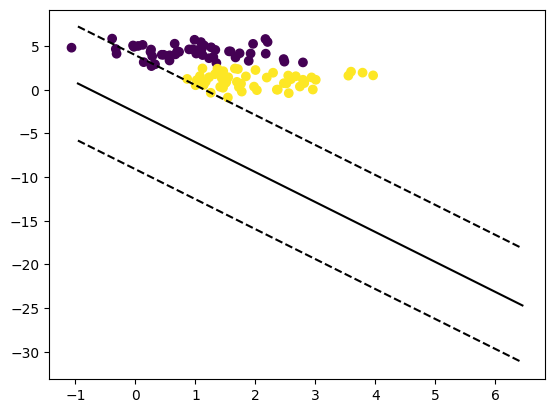

In [15]:
def visualize(data_dict):
    
    #[[ax.scatter(x[0],x[1],s=100,color=color[i])]
    plt.scatter(x[:,0],x[:,1],marker='o',c=y)
    
    #hyperplane=x,w+b
    #v=x,w+b
    #正的value psv=1
    #負的value nsv=-1
    #剛好為0的value dec=0
    #在這邊因為是用x[:,0],x[:,1] 的方式來畫x,y軸
    #所以實際的方程式原本為此 v=w1*x[:,0]+w2*x[:,1]+b 進而求出w1,w2之間的關係
    def hyperplane_value(x,w1,w2,b,v):
        return (-w1*x-b+v) / w2
    #max_feature_value表示為在x1,x2的圖上最右或者最上的值 
    #在這裡可以限制圖上的datapoint
    datarange=(min_feature_value*0.9,max_feature_value*1.1)
    hyp_x_min=datarange[0]
    hyp_x_max=datarange[1]
    #(w,x+b)=1 預測為1
    #positive support vector hyperplane
    psv1=hyperplane_value(hyp_x_min,w[0],w[1],w[2],1)
    psv2=hyperplane_value(hyp_x_max,w[0],w[1],w[2],1)
    plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k--')
    
    #(w,x+b)=-1
    #negative support vector hyperplane
    nsv1=hyperplane_value(hyp_x_min,w[0],w[1],w[2],-1)
    nsv2=hyperplane_value(hyp_x_max,w[0],w[1],w[2],-1)
    plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k--')
    
    #(w,x+b)=0
    #positive support vector hyperplane
    db1=hyperplane_value(hyp_x_min,w[0],w[1],w[2],0)
    db2=hyperplane_value(hyp_x_max,w[0],w[1],w[2],0)
    plt.plot([hyp_x_min,hyp_x_max],[db1,db2],'k')
    
    plt.show()

visualize(data_dict)    